# NBA Endorser Pre-Research
## Show Case
BUDT758X  
4/3/2019  
Group 18   
Fangao Fu, Zijian Shen, Zizhao Liu
***

#### Background: 
As a new brand in the sports apparel market, we are looking for potential endorsers in NBA. Due to our tight budget, we want a player who can estabilish a long term relationship at relatively low cost rahter than sign a contract with players who already have endorsements. 

#### Description of the data: 
*  NBA 2017 endorsement stats. 
*  NBA players' performance dataset of 2017.
*  Since there’s not enough data for us to use related to endorsement, we created our own data set by searching website one by one.
***


# Data Processing 

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Scrapy NBA players endorsement data from website
url = 'https://github.com/noahgift/socialpowernba/blob/master/data/nba_2017_endorsement_full_stats.csv'
endorse = pd.read_html(url, match='PLAYER')[0]

In [3]:
# Define a function that reset the index
def to_one(df):
    df.index=np.arange(1,len(df)+1)

In [4]:
# Drop the first Unnamed column
endorse.drop(['Unnamed: 0'],axis = 1, inplace = True)
# Change the index starts from 1
to_one(endorse)

### Data cleaning for player performance dataset

In [5]:
# Upload performance dataset
performance = pd.read_csv('nba_2017_players_with_salary_wiki_twitter.csv')
# Drop the first Unnamed column
performance.drop(['Unnamed: 0'], axis = 1, inplace = True)
to_one(performance)

In [6]:
# Change unit of number to maintain consistency
performance['PAGEVIEWS'] = performance['PAGEVIEWS'].apply(lambda x: round(x/1000,2))
# Rename the column to maintain consistency
performance.rename(columns={'PAGEVIEWS':'PAGEVIEWS_1K','TWITTER_FAVORITE_COUNT':'TWITTER_FAVORITE_COUNT_1K'},inplace = True)
# Change the unit and rename column
performance['TWITTER_FAVORITE_COUNT_1K'] = performance['TWITTER_FAVORITE_COUNT_1K'].apply(lambda x: round(x/1000,2))

### Consistency of two datasets
We found that the columns TWITTER_FAVORITE_COUNT_10k got the wrong unit in the endorse dataset.The actual unit should be 1k instead of 10k.Therefore,we change it to 1k to match with performance dataset.

In [7]:
# Change the name of column
endorse.rename(columns={'WIKIPEDIA_PAGEVIEWS_10K':'PAGEVIEWS_1K'},inplace = True)

### Create new dataset

Dataset 'endorse' does not contain enough information for a convincible analysis. Therefore, we gathered more endorsement information from website and create our own excel named 'Project.xlsx'.

In [8]:
# Import excel file we create
endorse_trend = pd.read_excel('Project.xlsx', sheet_name='Sheet1',skiprows = 6)
to_one(endorse_trend)
 

In [9]:
endorse_trend['ENDORSEMENT_MILLIONS_MEAN']=endorse_trend[['2016_ENDORSEMENT_MILLIONS','ENDORSEMENT_MILLIONS','2018_ENDORSEMENT_MILLIONS']].apply(np.mean,axis=1).round(1)

Since we don't have enough data for our evaluation, for players who do not have endorsements in 2017, we substitute null values with three-year mean.

In [10]:
# Substitude null values
endorse_trend.loc[endorse_trend['ENDORSEMENT_MILLIONS'].isnull(),'ENDORSEMENT_MILLIONS']=endorse_trend['ENDORSEMENT_MILLIONS_MEAN']

In [11]:
endorse_trend.head()

,PLAYER,TEAM,2016_ENDORSEMENT_MILLIONS,ENDORSEMENT_MILLIONS,2018_ENDORSEMENT_MILLIONS,ENDORSEMENT_MILLIONS_MEAN
1,LeBron James,Cleveland Cavaliers,54.0,55.0,52,53.7
2,Kevin Durant,Golden State Warriors,36.0,36.0,33,35.0
3,James Harden,Houston Rockets,17.0,20.0,20,19.0
4,Russell Westbrook,Oklahoma City Thunder,9.0,15.0,19,14.3
5,Carmelo Anthony,New York Knicks,8.0,8.0,7,7.7


In [12]:
ori_list = endorse["PLAYER"].tolist()
new_list = endorse_trend["PLAYER"].tolist()
# list of new player
new_player = list(set(new_list) - set(ori_list))

# identify adding players from the original endorse dataset
new=endorse_trend[endorse_trend['PLAYER'].isin(new_player)]
play=new[['PLAYER','ENDORSEMENT_MILLIONS']]

In [13]:
# Combine the self-created dataset with endorsement data
x=pd.concat([endorse[['PLAYER','ENDORSEMENT_MILLIONS']],play],axis=0,sort=False)
x

,PLAYER,ENDORSEMENT_MILLIONS
1,LeBron James,55.0
2,Kevin Durant,36.0
3,James Harden,20.0
4,Russell Westbrook,15.0
5,Carmelo Anthony,8.0
6,Dwyane Wade,13.0
7,Chris Paul,8.0
8,Derrick Rose,14.0
9,Kyrie Irving,13.0
10,Stephen Curry,35.0


In [14]:
# Final dataset
result=pd.merge(x,performance,on=['PLAYER'])
to_one(result)
result

,PLAYER,ENDORSEMENT_MILLIONS,Rk,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS_1K,TWITTER_FAVORITE_COUNT_1K,TWITTER_RETWEET_COUNT
1,LeBron James,55.0,8,SF,32,37.8,9.9,18.2,0.548,1.7,...,1.93,8.42,20.43,18.3,98.38,51,30.96,14.70,5.53,1501.5
2,Kevin Durant,36.0,12,SF,28,33.4,8.9,16.5,0.537,1.9,...,1.33,5.74,12.24,18.6,103.71,51,26.50,6.29,1.43,366.0
3,James Harden,20.0,2,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3.28,0.97,321.5
4,Russell Westbrook,15.0,1,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4.28,2.13,559.0
5,Carmelo Anthony,8.0,22,SF,32,34.3,8.1,18.8,0.433,2.0,...,-1.75,0.12,5.26,11.8,98.48,29,24.56,3.77,0.72,220.0
6,Dwyane Wade,13.0,39,SG,35,29.9,6.9,15.9,0.434,0.8,...,-0.46,-0.91,2.52,12.1,98.20,29,23.20,4.67,0.35,149.5
7,Chris Paul,8.0,42,PG,31,31.5,6.1,12.9,0.476,2.0,...,2.76,7.92,13.48,18.2,98.19,43,22.87,2.69,0.83,178.5
8,Derrick Rose,14.0,44,PG,28,32.5,7.2,15.3,0.471,0.2,...,-2.36,-2.25,1.17,11.2,99.19,26,21.32,3.27,1.86,2504.5
9,Kyrie Irving,13.0,11,PG,24,35.1,9.3,19.7,0.473,2.5,...,-2.30,2.05,8.28,13.5,99.12,47,17.64,4.80,1.54,695.0
10,Stephen Curry,35.0,10,PG,28,33.4,8.5,18.3,0.468,4.1,...,0.14,7.41,18.80,15.1,105.08,65,12.11,17.57,12.28,2893.0


***
## Evaluation and Visualization
#### Question: Which measurements are important factors related to endorsement?

#### First Step:
 * We only focus on variables that are highly correlated with endorsement.

In [15]:
# Correlation calculation
a=pd.DataFrame(result.corr()['ENDORSEMENT_MILLIONS'])
a=a[a['ENDORSEMENT_MILLIONS']>=0.6].sort_values(by='ENDORSEMENT_MILLIONS')
corr=result[a.index].corr()

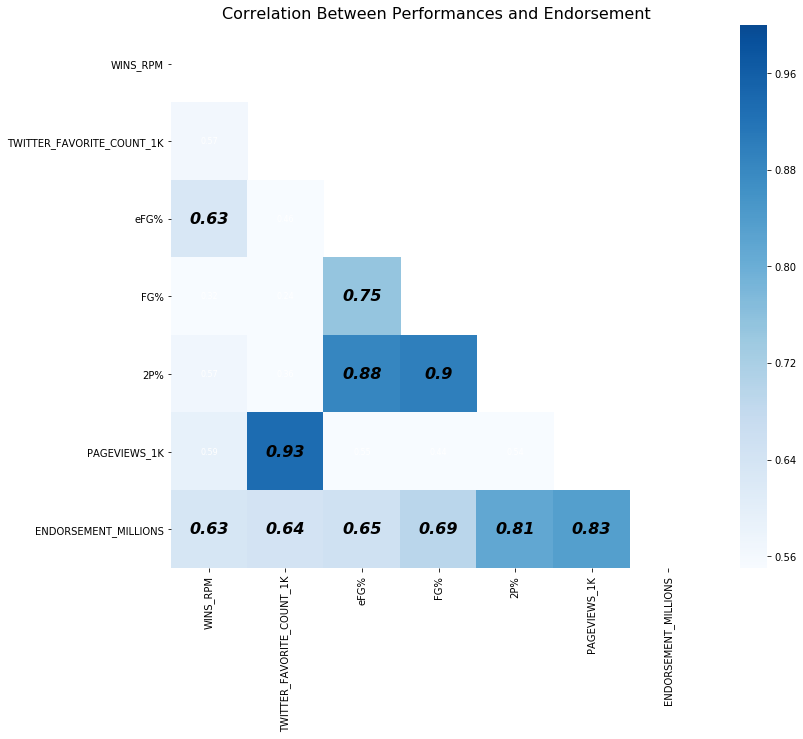

In [16]:
# Heatmap shows the correlation
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))

pic=sns.heatmap(corr,annot=True,mask=mask,cmap='Blues',vmin=0.55,vmax=1,center=0.8)
plt.title(fontsize=16,label='Correlation Between Performances and Endorsement ')

for text in pic.texts:
    text.set_size(8)
    if text.get_text() >= '0.6':
        text.set_size(16)
        text.set_weight('bold')
        text.set_style('italic')
        text.set_color('black')
    if text.get_text()< '0.6':
        text.set_color('white')
plt.show()

#### Second Step:
* As it shows in the heatmap, some of those six variables are highly correlated with each other; thus, it does not make much sense using them together. Therefore, we choose six pairs of variables which has relatively strong relationships with endorsement and low correlation with each other.

In [17]:
# Selected Pairs
corr[corr<0.6][['2P%','PAGEVIEWS_1K']]

,2P%,PAGEVIEWS_1K
WINS_RPM,0.567659,0.592047
TWITTER_FAVORITE_COUNT_1K,0.362003,NaN
eFG%,NaN,0.549984
FG%,NaN,0.438532
2P%,NaN,0.540680
PAGEVIEWS_1K,0.540680,NaN
ENDORSEMENT_MILLIONS,NaN,NaN


In [18]:
# Generate a dataframe that does not contain players who had endorsement already.
measure=performance[~performance.PLAYER.isin(result.PLAYER)].reset_index(drop=True)
match=dict(zip(list(measure.index),list(measure['PLAYER'])))#Match the index with player's name for further scatter plot labeling


In [19]:
# Define a function that generate a kde plot and scatter plots.
def graph(a,b):
    g=result[a]
    m=measure.loc[measure[a]>=min(g)]
    m=m.loc[m[a]<=max(g)]
    t=result[b]
    m=m.loc[measure[b]>=min(t)]
    m=m.loc[m[b]<=max(t)]
    x=list(m[a])
    y=list(m[b])
    plt.figure(figsize=(20,15))
    sns.set_style('whitegrid')
    plt.title(y=1.02,fontsize=20,label='Player Categorized by %s and %s'%(a,b))
    cmap = sns.cubehelix_palette(dark=0.5,light=1,as_cmap=True)
    ax=sns.kdeplot(g, t,
                  cmap=cmap, shade=True, shade_lowest=False,cbar=True,n_levels=30)
    
    ax.scatter(x, y,c='0.25',marker='*',s=100)
  
    for i in range(len(x)):
        text=ax.text(x[i],y[i],match[i])
        text.set_size(15)
        text.set_rotation(0)
        text.set_rotation_mode(None)
    
    plt.show()    

In [20]:
# Define a function that gives us detail information of scatter plot
def doc(a,b):
    g=result[a]
    m=measure.loc[measure[a]>=min(g)]
    m=m.loc[m[a]<=max(g)]
    t=result[b]
    m=m.loc[measure[b]>=min(t)]
    m=m.loc[m[b]<=max(t)]
    return m[['PLAYER',a,b]]

We use endorsement data to generate a kde plot which will give us a boundary of potential endorser selection and here's an example of our result.

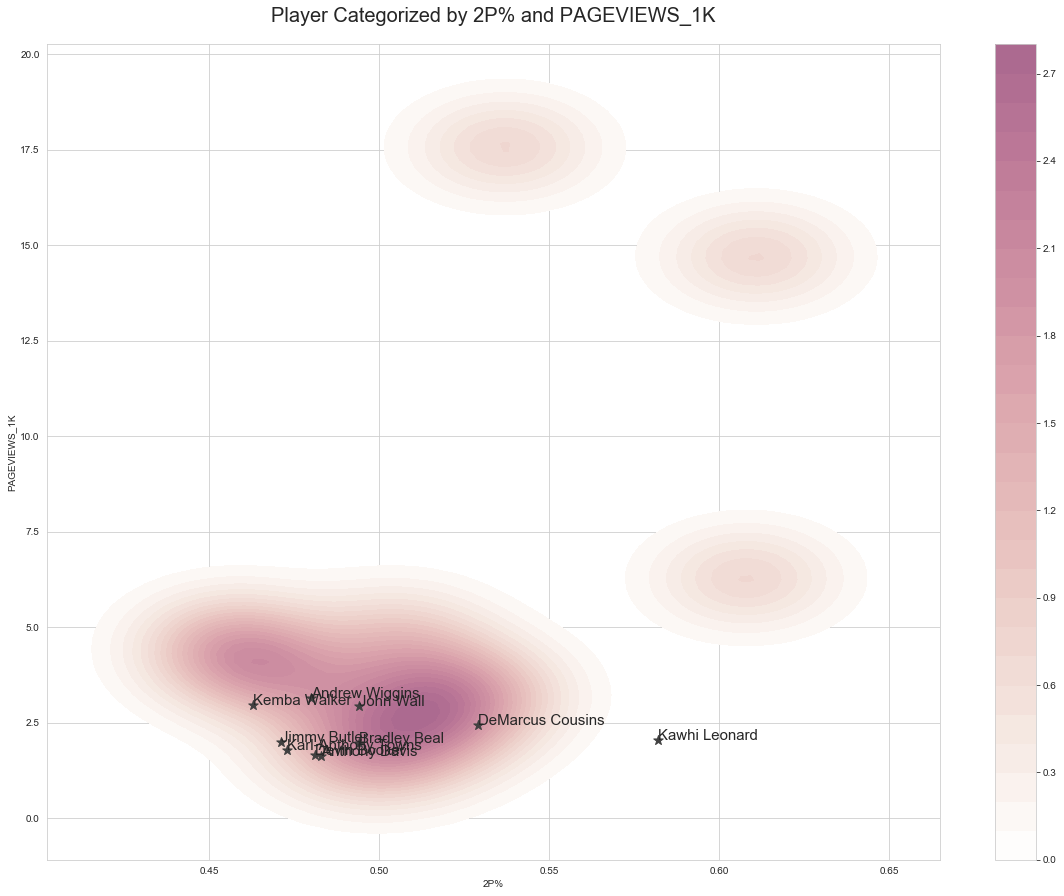

In [21]:
# Example of 2P% and WINS_RPM
graph('2P%','PAGEVIEWS_1K')

In [22]:
# Example of 2P% and WINS_RPM 
doc('2P%','PAGEVIEWS_1K').head()

,PLAYER,2P%,PAGEVIEWS_1K
1,DeMarcus Cousins,0.483,1.63
2,Kawhi Leonard,0.529,2.45
3,Karl-Anthony Towns,0.582,2.05
5,Andrew Wiggins,0.473,1.78
17,Kevin Love,0.471,2.01


#### Third Step:
* After our previous processing steps, we combine six results together and find the most potential players. 

In [23]:
# Generate results 
pair1 = set(doc('PAGEVIEWS_1K','eFG%')['PLAYER'])
pair2 = set(doc('PAGEVIEWS_1K','FG%')['PLAYER'])
pair3 = set(doc('PAGEVIEWS_1K','WINS_RPM')['PLAYER'])
pair4 = set(doc('2P%','WINS_RPM')['PLAYER'])
pair5 = set(doc('2P%','TWITTER_FAVORITE_COUNT_1K')['PLAYER'])
pair6 = set(doc('2P%','PAGEVIEWS_1K')['PLAYER'])

In [24]:
# Find the most potential players
potential_players = list(pair1 & pair2 & pair3 & pair4 & pair5 & pair6)
potential_players

['Pau Gasol', 'Dirk Nowitzki', 'Jeremy Lin', 'Kevin Love', 'Kawhi Leonard']

***

## Comprehensive Evaluation 

Each pair of variables only gives us partial information. Therefore, a more comprehensice analysis is necessary. 

In [25]:
# Benchmark generated from endorsement dataset
df=pd.DataFrame(result[corr.index.tolist()[:-1]].apply(np.mean)).T# Take mean of every measurement
df.index=['Standard']
df

,WINS_RPM,TWITTER_FAVORITE_COUNT_1K,eFG%,FG%,2P%,PAGEVIEWS_1K
Standard,11.016429,2.080714,0.529214,0.469357,0.514286,5.337143


In [26]:
# Append our benchmark into partial performance dataset.
x=df.append(measure[df.columns.tolist()],sort=False)
x.head()

,WINS_RPM,TWITTER_FAVORITE_COUNT_1K,eFG%,FG%,2P%,PAGEVIEWS_1K
Standard,11.016429,2.080714,0.529214,0.469357,0.514286,5.337143
0,12.810000,0.370000,0.518000,0.505000,0.524000,0.080000
1,11.260000,0.100000,0.498000,0.452000,0.483000,1.630000
2,15.530000,2.700000,0.541000,0.485000,0.529000,2.450000
3,10.000000,0.000000,0.576000,0.542000,0.582000,2.050000


We decide to normalize 6 variables using MaxminScaler because each variable measure different thing, and have different ranges. so it is not reasnable to just calculate them this way.  after normalizatilon, we can calculate distance between each player and our benchmark. 

In [27]:
#Normalization and calculate difference
a=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(x.values))
a.columns=df.columns.tolist()
a.index=x.index
s = a.loc['Standard']
a['difference']=a.apply(lambda x: sum((s-x)**2),axis=1)
a.head()

,WINS_RPM,TWITTER_FAVORITE_COUNT_1K,eFG%,FG%,2P%,PAGEVIEWS_1K,difference
Standard,0.678009,0.303754,0.689747,0.571884,0.392857,1.000000,0.000000
0,0.769192,0.054015,0.665208,0.647558,0.405000,0.014989,1.047406
1,0.690391,0.014599,0.621444,0.535032,0.353750,0.305407,0.573776
2,0.907473,0.394161,0.715536,0.605096,0.411250,0.459047,0.355564
3,0.626335,0.000000,0.792123,0.726115,0.477500,0.384101,0.515701


In [28]:
# Identify top ten players that are closest to the benchmark.
a.insert(loc=0,column='PLAYER',value=measure['PLAYER'])
top10=a.sort_values(by='difference').head(11)
top10


,PLAYER,WINS_RPM,TWITTER_FAVORITE_COUNT_1K,eFG%,FG%,2P%,PAGEVIEWS_1K,difference
Standard,NaN,0.678009,0.303754,0.689747,0.571884,0.392857,1.000000,0.000000
2,Kawhi Leonard,0.907473,0.394161,0.715536,0.605096,0.411250,0.459047,0.355564
85,Draymond Green,0.974072,0.091971,0.584245,0.462845,0.367500,0.552730,0.356219
43,Dirk Nowitzki,0.271479,0.227737,0.614880,0.503185,0.328750,0.554604,0.383857
40,Jeremy Lin,0.230300,0.137226,0.647702,0.505308,0.350000,0.590203,0.404144
17,Kevin Love,0.614133,0.127007,0.647702,0.481953,0.338750,0.376606,0.436722
121,Vince Carter,0.362481,0.000000,0.643326,0.411890,0.272500,0.541488,0.444296
59,Pau Gasol,0.396543,0.128467,0.730853,0.641189,0.367500,0.370985,0.512744
3,Karl-Anthony Towns,0.626335,0.000000,0.792123,0.726115,0.477500,0.384101,0.515701
1,DeMarcus Cousins,0.690391,0.014599,0.621444,0.535032,0.353750,0.305407,0.573776


We compare two results together and find that they fit each other.

In [29]:
# Consistency check
b=a[a['PLAYER'].isin(potential_players)]
b[['PLAYER']]

,PLAYER
2,Kawhi Leonard
17,Kevin Love
40,Jeremy Lin
43,Dirk Nowitzki
59,Pau Gasol


Let's brief look at these player, we find that some performance such as 2P% or eFG% are closer and even higher than the standard. In this case, social power has more impact like pages views. So this might be the reason why these players haven't got endorsement or good endorsement. Our analysis may have some downsides because we don't consider the categorical variables like team, and position. We also ignore the fact that the value which is higher than the benchmark is a good sign. However, since benchmark is generate from the data of top players, it will not strongly affect our result. Moreover,these five players are still good potential endorsers we can consider about.

***
## Final Evaluation 
* We find that Kawhi Leonard already have good endorsement(14millions). We use choose other players(http://www.sportspromedia.com/news/kawhi-leonard-new-balance-endorsement)

In [30]:
# Data processing before analysis
top10.drop(['Standard',2],inplace = True)
top10=top10.drop(['difference'],axis=1)

Since the most important two aspects of an endorse are on-court performance and social power, we select one variable from each aspect.

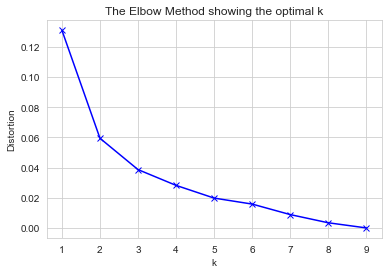

In [31]:
# K-mean cluster 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

X = np.array(list(zip(top10['eFG%'],top10['PAGEVIEWS_1K']))).reshape(len(top10['PAGEVIEWS_1K']), 2)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
#Generate result
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
top10['clustering']=cluster.fit_predict(X)

In [33]:
# Evaluation
top10=top10.iloc[:,[0,3,6,7]]
group=top10.groupby(by='clustering').agg('mean')
group

,eFG%,PAGEVIEWS_1K
clustering,,
0,0.729540,0.352998
1,0.622538,0.559756


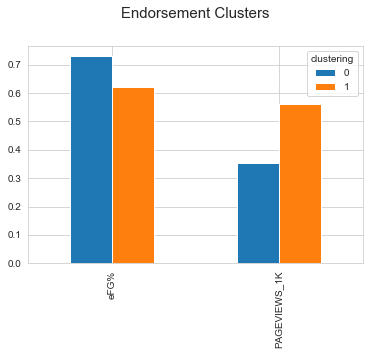

In [34]:
# Bar chart to show result
group.T.plot(kind='bar')
plt.title(y=1.1,label='Endorsement Clusters',fontsize=15);

k-means separates our potential players into two groups. Goup '0' has relatively higher performance while the other group has more social power. Since we are a sports apparel company, higher social power is more essential for promotinig our brand. 

In [37]:
#Final result
top10.loc[top10['clustering']==1]

,PLAYER,eFG%,PAGEVIEWS_1K,clustering
85,Draymond Green,0.584245,0.552730,1
43,Dirk Nowitzki,0.614880,0.554604,1
40,Jeremy Lin,0.647702,0.590203,1
121,Vince Carter,0.643326,0.541488,1
